## Import modules

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *

## Weather Report
#### Feature descriptions

| Feature             | Description                                                                                  |
|---------------------|----------------------------------------------------------------------------------------------|
| **location**        | The city or region of the waether forecase                                                   |
| **forecastdate**    | The date and time of the weather forecast                                                    |
| **description**     | Weather conditions                                                                           |
| **feels_like**      | The apparent temperature based on human perception, measured in Kelvin                       |
| **humidity**        | The percentage of moisture in the air (0-100%)                                               |
| **pressure**        | Atmospheric pressure at sea level in hPa (hectopascals)                                      |
| **sunrise**         | The timestamp of the sunrise time, in Unix format                                            |
| **sunset**          | The timestamp of the sunset time, in Unix format                                             |
| **temp**            | The current temperature in Kelvin                                                            |
| **temp_max**        | The maximum temperature forecast for the day in Kelvin                                       |
| **temp_min**        | The minimum temperature forecast for the day in Kelvin                                       |
| **wind**            | The wind speed in meters per second                                                          |
| **forecast_timestamp** | The timestamp when the forecast data was recorded or generated                            |


In [30]:
weather = getWeatherDF()
weather['forecast_timestamp'] = pd.to_datetime(weather['forecastdate'], format="%d-%m-%Y %H:%M")
print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())

Weather from  2024-11-26 04:02:32  To  2024-11-26 04:23:23


In [31]:
weather

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
0,New York,2024-11-26 04:03:00,overcast clouds,282.140015,60.0,1016.0,1732535702,1732570303,283.480011,284.450012,281.079987,3.13,2024-11-26 04:03:00
1,New York,2024-11-26 04:03:57,overcast clouds,282.140015,60.0,1016.0,1732535702,1732570303,283.480011,284.450012,281.079987,3.13,2024-11-26 04:03:57
2,New York,2024-11-26 04:04:54,overcast clouds,282.140015,60.0,1016.0,1732535702,1732570303,283.480011,284.450012,281.079987,3.13,2024-11-26 04:04:54
3,New York,2024-11-26 04:05:51,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:05:51
4,New York,2024-11-26 04:06:47,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:06:47
5,New York,2024-11-26 04:07:45,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:07:45
6,New York,2024-11-26 04:08:42,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:08:42
7,New York,2024-11-26 04:09:39,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:09:39
8,New York,2024-11-26 04:10:35,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:10:35
9,New York,2024-11-26 04:11:32,overcast clouds,282.209991,61.0,1016.0,1732535702,1732570303,283.519989,284.450012,281.119995,3.13,2024-11-26 04:11:32


#### Weather Data Recorded By Location in Kelvin

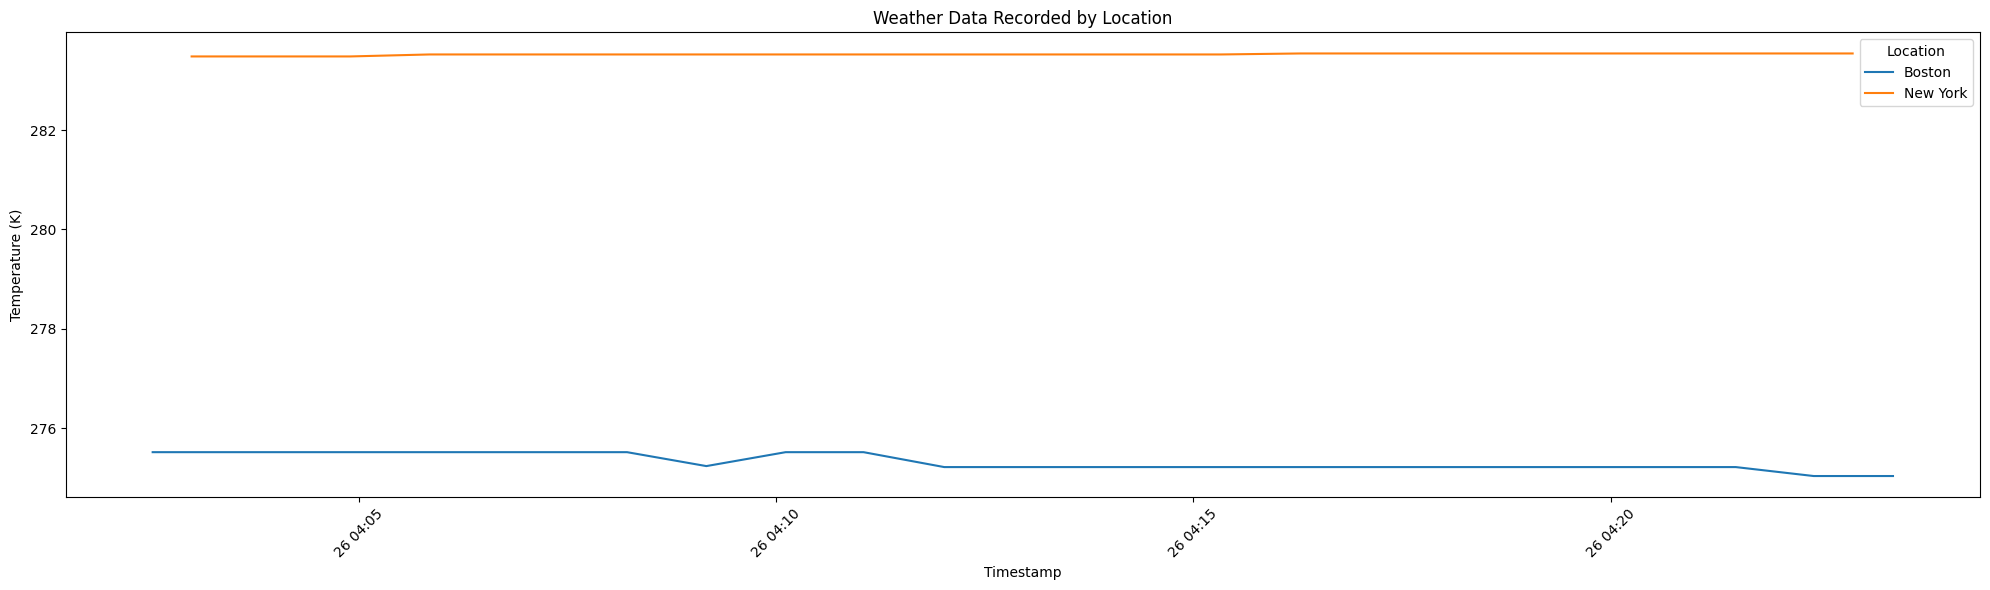

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))

# Group the data by 'location' and plot the temperature for each location
for location, group in weather.groupby('location'):
    plt.plot(group['forecast_timestamp'], group['temp'], label=location)

plt.xlabel("Timestamp")
plt.ylabel("Temperature (K)") 
plt.title("Weather Data Recorded by Location")
plt.legend(title='Location')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

#### Weather Data Recorded By Location in Celcius

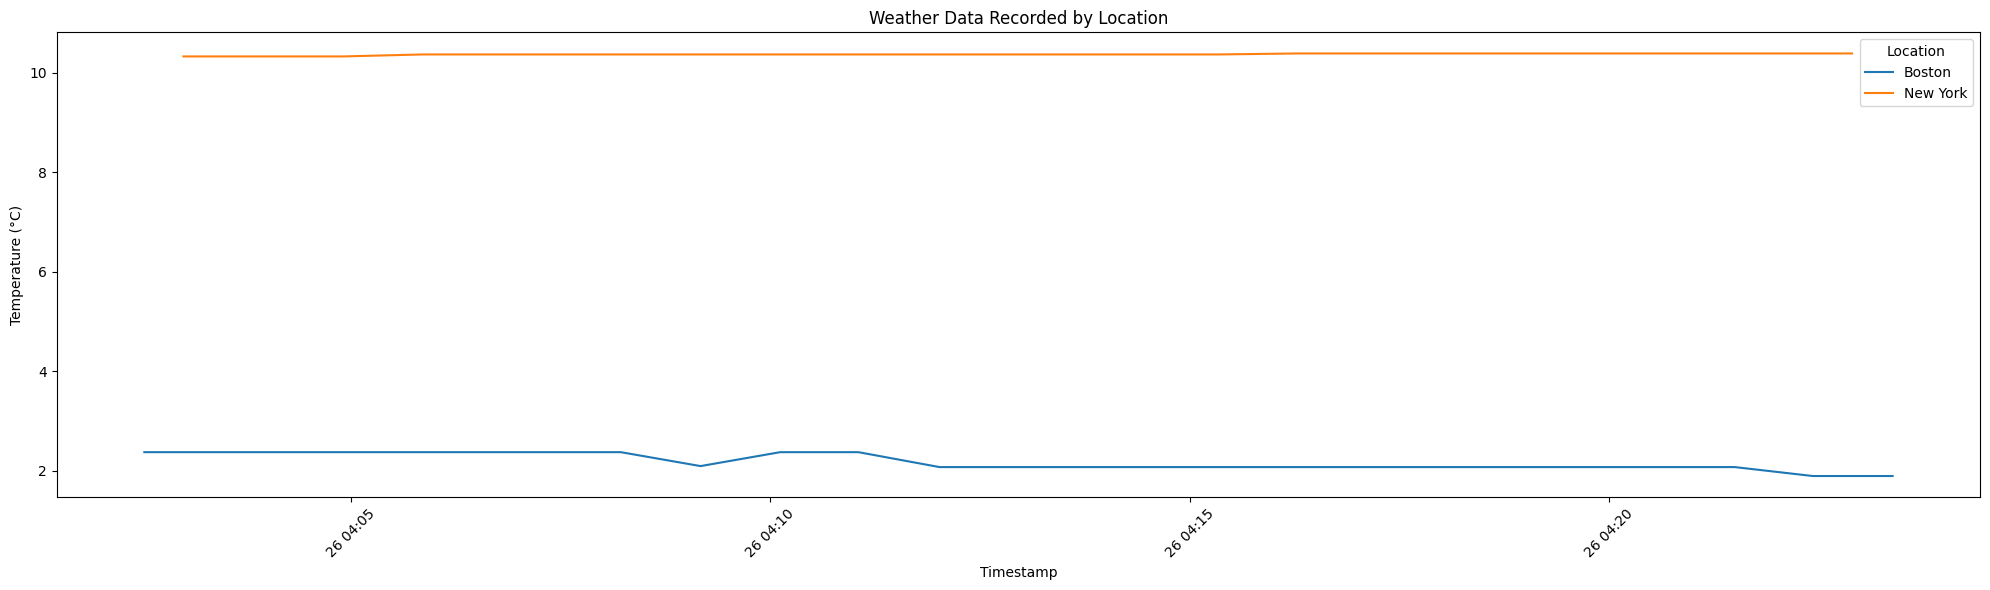

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))

# Group the data by 'location' and plot the temperature for each location
for location, group in weather.groupby('location'):
    # Convert temperature from Kelvin to Celsius
    group['temp_celsius'] = group['temp'] - 273.15
    plt.plot(group['forecast_timestamp'], group['temp_celsius'], label=location)

plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")  # Update label to Celsius
plt.title("Weather Data Recorded by Location")
plt.legend(title='Location')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Faker Report
#### Feature descriptions

| Feature                | Description                                                                                            |
|------------------------|--------------------------------------------------------------------------------------------------------|
| **ssn**                | Social Security Number (SSN)                                                                           |
| **address**            | The physical address of the individual                                                                 |
| **city**               | The city in which the individual resides                                                               |
| **country**            | The country where the individual resides                                                               |
| **credit_card_number** | The number of the credit card used by the individual                                                   |
| **credit_card_provider** | The provider or brand of the credit card                                                             |
| **email**              | The individual's email address                                                                         |
| **name**               | Full name of the individual, including title and any professional designation                          |
| **phone_number**       | The individual's phone number, including extensions if applicable                                      |
| **year**               | The year associated with the record, potentially indicating the year the record was created or updated |


In [23]:
faker = getFakerDF()
faker

fakerdata


,ssn,address,city,country,credit_card_number,credit_card_provider,email,name,phone_number,year
0,298-15-2847,Unit 9274 Box 3685\nDPO AE 02193,South Regina,Finland,4969630533254152,VISA 19 digit,hollanddavid@example.com,Mrs. Casey Baker DVM,3169015110,1989
1,823-92-8118,"8183 Brown Way Apt. 721\nWileystad, NH 45035",North Sandraside,Afghanistan,6011441427809900,Discover,taylor98@example.org,Timothy Johnson,921.599.2047x458,2017
2,221-19-6504,USCGC Baker\nFPO AE 30174,East Jasonchester,Kuwait,4672860913092108,Maestro,erinbrewer@example.org,Thomas York,001-720-881-0267x654,1983
3,153-77-6628,"3665 Pierce Green Apt. 209\nSouth Jefferyfurt,...",East Mackenzie,Ecuador,6011908819861293,Discover,scott02@example.net,Mr. Ryan Evans,+1-277-860-2026x9059,2005
4,604-31-8319,"202 Daniel Street Apt. 513\nPort James, SC 72390",North Peterchester,Australia,30515269951001,JCB 15 digit,smithmark@example.net,David King,001-820-878-5380x687,1975
...,...,...,...,...,...,...,...,...,...,...
726,645-65-9806,"7110 Amy Squares Apt. 985\nWest Josephmouth, M...",Harrisonborough,Luxembourg,4537680122192039457,VISA 13 digit,meltonrobert@example.com,Danny Mcgrath,601-942-1252x8706,1985
727,887-57-4565,"78572 David Meadow Apt. 606\nLake Johnchester,...",East Matthewmouth,Iceland,4485009157517332,VISA 19 digit,tami79@example.net,Yolanda Gomez,6498509132,1981
728,720-12-7022,"3865 Alicia Hollow\nEast Joseph, OK 13005",Amandamouth,Argentina,30440731896462,VISA 19 digit,ethompson@example.com,Craig Chapman,241-366-3274,1986
729,016-38-1145,"03748 Jose Island\nSouth Cody, MA 67506",North Hunterburgh,Suriname,180005197700595,VISA 13 digit,paula35@example.org,Brandon Rogers,296-317-2803x47238,2015


## Codeforces Report
#### Feature descriptions

| **Feature**          | **Description**                                                                                                                      |
|----------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| **handle**             | The unique username or handle of the user on Codeforces.                                                                             |
| **contribution**       | The number of contributions the user has made.                                                                                       |
| **country**            | The country where the user is from. If unavailable, this field may be `None`.                                                        |
| **last_online_time**   | The Unix timestamp of the last time the user was online on Codeforces.                                                               |
| **max_rank**           | The highest rank the user has ever achieved on Codeforces (e.g., `pupil`, `specialist`, `newbie`).                                   |
| **max_rating**         | The highest rating the user has ever achieved.                                                                                       |
| **rank**               | The user's current rank on Codeforces (e.g., `pupil`, `specialist`, `newbie`).                                                       |
| **rating**             | The user's current rating on Codeforces.                                                                                             |
| **registration_time**  | The Unix timestamp of when the user registered on Codeforces.                                                                        |


In [32]:
codeforces = getCodeforcesDF()
codeforces

,handle,contribution,country,last_online_time,max_rank,max_rating,rank,rating,registration_time
0,gagan_4656,0,India,1732428716,pupil,1305,pupil,1253,1720714422
1,_doppelganger_,0,None,1731920939,specialist,1437,pupil,1255,1557899377
2,rdj68,0,None,1732196214,newbie,1037,newbie,976,1715446447
3,fogsail,0,China,1732455252,pupil,1304,pupil,1304,1524189448
4,reslow,0,Kyrgyzstan,1732456327,pupil,1231,newbie,1173,1665326667
...,...,...,...,...,...,...,...,...,...
3364,ankit_756,0,None,1732109827,specialist,1465,specialist,1453,1644821571
3365,Awaann,0,India,1732389057,pupil,1328,pupil,1328,1722868910
3366,arhridoy154,0,None,1732470524,newbie,399,newbie,399,1723272897
3367,julius_novachrono,0,India,1730608101,pupil,1287,newbie,1123,1614078035


#### Rating Distribution in Codeforces

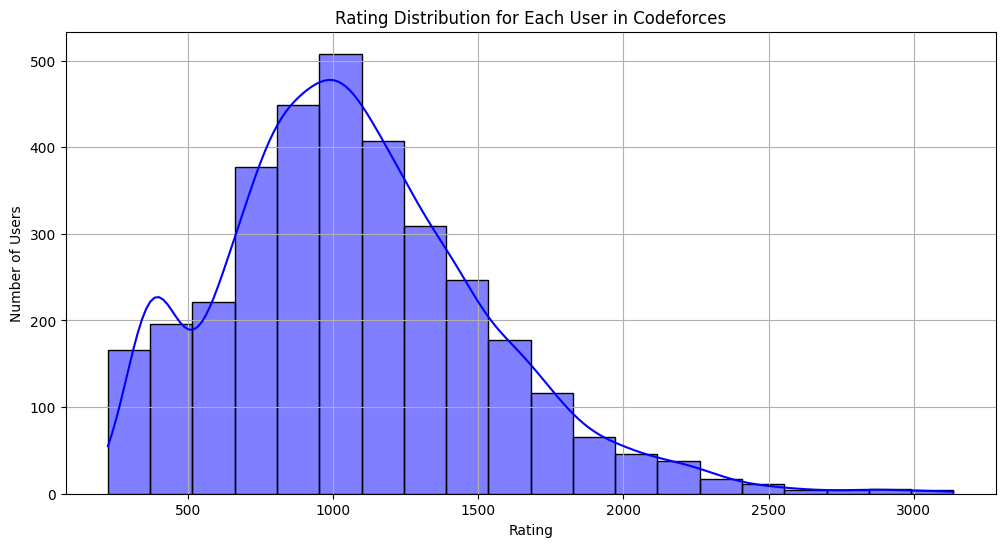

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame
df = pd.DataFrame(codeforces)

# Plot 1: Rating Distribution (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True, bins=20, color='blue')
plt.title('Rating Distribution for Each User in Codeforces')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

#### Ranks Distribution in Codeforces

/tmp/ipykernel_82/4155361866.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rank_counts.index, y=rank_counts.values, palette=rank_colors, order=filtered_rank_order)


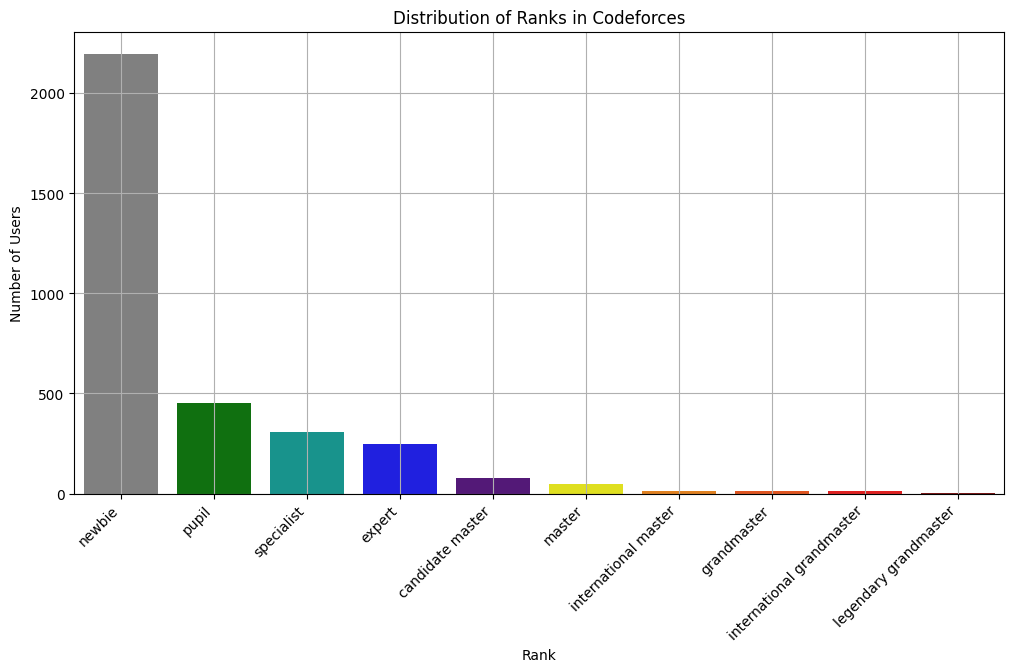

In [35]:
def apply_color_map(rank):
    return rank_color_map.get(rank, default_color)

# Define the strict order of ranks
rank_order = [
    "newbie", 
    "pupil", 
    "specialist", 
    "expert", 
    "candidate master", 
    "master", 
    "international master", 
    "grandmaster", 
    "international grandmaster", 
    "legendary grandmaster"
]

# Define color for each rank
rank_color_map = {
    "Unrated": "#000000",
    "newbie": "#808080", 
    "pupil": "#008000",  
    "specialist": "#03A89E",  
    "expert": "#0000FF",  
    "candidate master": "#570987",  
    "master": "#FFFF00", 
    "international master": "#FF8000", 
    "grandmaster": "#FF4500", 
    "international grandmaster": "#FF0000", 
    "legendary grandmaster": "#8B0000" 
}


default_color = "#D3D3D3" 

# Count the occurrences of each rank
rank_counts = df['rank'].value_counts()

# Ensure the rank distribution follows the strict order, but only include ranks that exist in rank_counts
filtered_rank_order = [rank for rank in rank_order if rank in rank_counts]

# Apply the color map to the ranks
rank_colors = [apply_color_map(rank) for rank in filtered_rank_order]

# Create a plot for rank distribution using 'hue' to assign the colors
plt.figure(figsize=(12, 6))

# Update the barplot, using the 'order' parameter to explicitly set the order of ranks
sns.barplot(x=rank_counts.index, y=rank_counts.values, palette=rank_colors, order=filtered_rank_order)

plt.title('Distribution of Ranks in Codeforces')
plt.xlabel('Rank')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
